# Статистический анализ данных поездок в такси

**Подключение необходимых библиотек python**

In [75]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации

# Модули статистических функций
import statistics as st
from scipy import stats

In [76]:
import warnings  
warnings.filterwarnings('ignore')  # для игнорирования некритичных предупреждений

**Загрузка файла с датасетом и формирование датафрейма**

In [77]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')

df

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1
...,...,...,...,...,...,...
1995,918581,5,21.704595,8.590702,Delivery,1
1996,918656,7,27.587379,30.834933,Comfort,1
1997,918683,4,16.827856,20.365287,Delivery,0
1998,918737,2,18.979144,14.959835,Economy,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   float64
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 93.9+ KB


Краткий вывод статистики по столбцам

In [79]:
df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,21.520472,26.275849,0.587000
std,270556.211847,2.007256,4.355491,18.876337,0.492496
min,412.000000,1.000000,14.899553,0.024259,0.000000
25%,227126.500000,2.000000,18.466897,12.176830,0.000000
50%,458637.000000,4.000000,20.414741,22.828544,1.000000
75%,709420.250000,6.000000,23.497139,36.434558,1.000000
max,919196.000000,7.000000,50.206056,138.950082,1.000000


**Создадим отдельные датафреймы по классам поездки**

In [80]:
df_economy = df[df['offer_class_group'] == 'Economy']
df_comfort = df[df['offer_class_group'] == 'Comfort']

if (df_economy['distance_km'].count() == df_comfort['distance_km'].count()):
  print('Выборки имеют одинаковое количество данных')
else:
  print('Выборки не равны. Приведите выборки к равному количеству данных')

Выборки имеют одинаковое количество данных


**Описательные статистики для кажого класса поездки**

In [81]:
from scipy.stats import iqr, skew, kurtosis
# Описательные статистики для класса Economy
stats_economy = {'Дисперсия': st.variance(df_economy['distance_km']),
 'СКО': st.stdev(df_economy['distance_km']),
 'Среднее': st.mean(df_economy['distance_km']),
 'Медиана': st.median(df_economy['distance_km']),
 'Мода': st.mode(df_economy['distance_km']),
  'Минимум': df_economy['distance_km'].min(),
  '25%': df_economy['distance_km'].quantile(0.25),
  '50%': df_economy['distance_km'].quantile(0.5),
  '75%': df_economy['distance_km'].quantile(0.75),
  'Максимум': df_economy['distance_km'].max(),
  'IQR': iqr(df_economy['distance_km']),
  'Размах': np.ptp(df_economy['distance_km']),
  'Коэф. эксцесса': skew(df_economy['distance_km']),
  'Коэф. ассиметрии': kurtosis(df_economy['distance_km']),
  'Коэф. вариации': st.stdev(df_economy['distance_km'])/st.mean(df_economy['distance_km'])*100}

df_statistics_economy = pd.DataFrame(stats_economy, index=[0])
df_statistics_economy = df_statistics_economy.T
df_statistics_economy.columns = ['Значение']

df_statistics_economy

,Значение
Дисперсия,289.549452
СКО,17.016153
Среднее,26.283117
Медиана,23.798183
Мода,83.829973
Минимум,0.089947
25%,13.372229
50%,23.798183
75%,36.845287
Максимум,90.516618


In [82]:
# Описательные статистики для класса Comfort
stats_comfort = {'Дисперсия': st.variance(df_comfort['distance_km']),
 'СКО': st.stdev(df_comfort['distance_km']),
 'Среднее': st.mean(df_comfort['distance_km']),
 'Медиана': st.median(df_comfort['distance_km']),
 'Мода': st.mode(df_comfort['distance_km']),
  'Минимум': df_comfort['distance_km'].min(),
  '25%': df_comfort['distance_km'].quantile(0.25),
  '50%': df_comfort['distance_km'].quantile(0.5),
  '75%': df_comfort['distance_km'].quantile(0.75),
  'Максимум': df_comfort['distance_km'].max(),
  'IQR': iqr(df_comfort['distance_km']),
  'Размах': np.ptp(df_comfort['distance_km']),
  'Коэф. эксцесса': skew(df_comfort['distance_km']),
  'Коэф. ассиметрии': kurtosis(df_comfort['distance_km']),
  'Коэф. вариации': st.stdev(df_comfort['distance_km'])/st.mean(df_comfort['distance_km'])*100}

df_statistics_comfort = pd.DataFrame(stats_comfort, index=[0])
df_statistics_comfort = df_statistics_comfort.T
df_statistics_comfort.columns = ['Значение']

df_statistics_comfort

,Значение
Дисперсия,311.333429
СКО,17.644643
Среднее,29.758910
Медиана,28.078273
Мода,2.142234
Минимум,0.024259
25%,16.345205
50%,28.078273
75%,41.300650
Максимум,81.507022


**Проведем тест Шапиро-Уилки на нормальность распределения для двух выборок**

In [83]:
# H0: Данные выборки получены из данных с нормальным распределением.
# H1: Данные выборки не получены из данных с нормальным распределением.

# Уровень значимости 5%
alpha = 0.05

In [84]:
from scipy.stats import shapiro, gaussian_kde

result_sh_eco = shapiro(df_economy['distance_km'])
print("Statistic:", result_sh_eco.statistic)
print("p-value: {:.8f}".format(result_sh_eco.pvalue))

if (result_sh_eco.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезу')

Statistic: 0.9592134068320972
p-value: 0.00000000
Отвергаем нулевую гипотезу


In [85]:
result_sh_com = shapiro(df_comfort['distance_km'])

print("Statistic:", result_sh_com.statistic)
print("p-value: {:.8f}".format(result_sh_com.pvalue))

if (result_sh_com.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезу')

Statistic: 0.9735098144507924
p-value: 0.00000007
Отвергаем нулевую гипотезу


In [86]:
# Отвергаем Нулевую гипотезу(H0) и принимаем альтернативную гипотезу(H1) о том, что набор данных НЕ распределен нормально.

**Визуализируем плотность распределения дистанции поездки по классам и построим QQ-график**

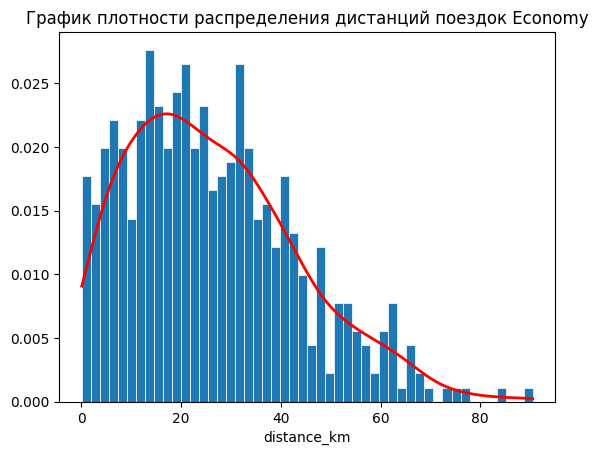

In [87]:
plt.hist(df_economy['distance_km'], 50, density=True,linewidth=0.5, edgecolor="white")
density = np.linspace(df_economy['distance_km'].min(), df_economy['distance_km'].max(), 1000)
kde = gaussian_kde(df_economy['distance_km'])
plt.plot(density, kde(density), linewidth=2, color='r')
plt.title('График плотности распределения дистанций поездок Economy')
plt.xlabel('distance_km')
plt.show()

In [88]:
# Вывод: На графике видно, что для выборки по классу "Economy" для данных типом распределения является логнормальное распределение

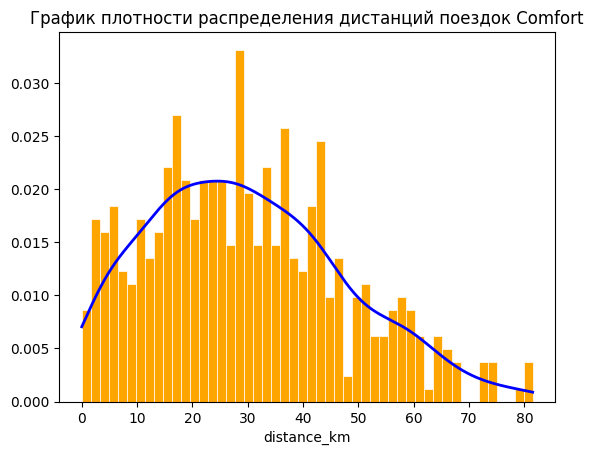

In [89]:
plt.hist(df_comfort['distance_km'], 50, density=True, color='orange', linewidth=0.5, edgecolor="white")
density = np.linspace(df_comfort['distance_km'].min(), df_comfort['distance_km'].max(), 1000)
kde = gaussian_kde(df_comfort['distance_km'])
plt.plot(density, kde(density), linewidth=2, color='b')
plt.title('График плотности распределения дистанций поездок Comfort')
plt.xlabel('distance_km')
plt.show()

In [90]:
# Вывод: На графике видно, что для выборки по классу "Comfort" для данных типом распределения является логнормальное распределение

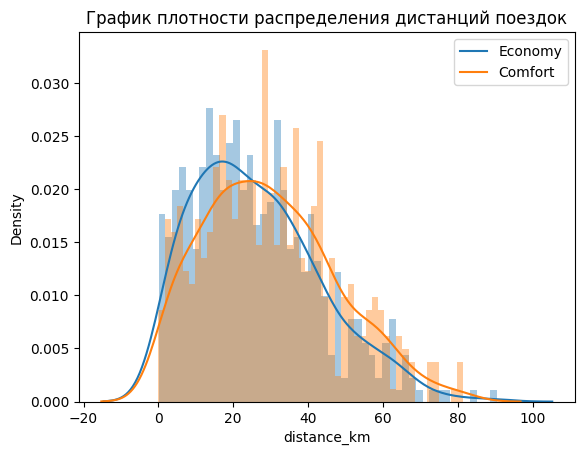

In [91]:
sns.distplot(df_economy['distance_km'], 50)
sns.distplot(df_comfort['distance_km'], 50)
plt.title('График плотности распределения дистанций поездок')
plt.legend(['Economy', 'Comfort'])
plt.show()

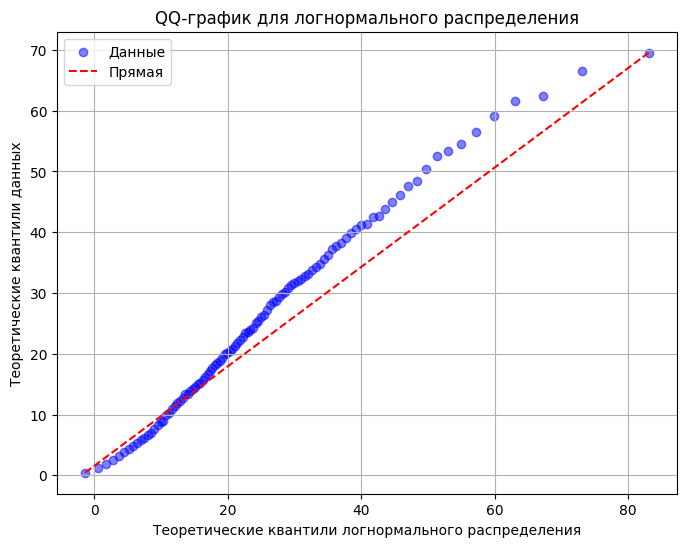

In [92]:
# Отсортируем данные для построения QQ-графика
sorted_data = df_economy['distance_km']

theoretical_quantiles = np.quantile(sorted_data, np.linspace(0.01, 0.99, 100))

# Создадим теоретическое логнормальное распределение с данными параметрами
params = stats.lognorm.fit(sorted_data)
theoretical_lognormal = stats.lognorm(*params)

# Получим квантили теоретического логнормального распределения
theoretical_quantiles_lognormal = theoretical_lognormal.ppf(np.linspace(0.01, 0.99, 100))

# Построим QQ-график
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles_lognormal, theoretical_quantiles, color='b', alpha=0.5, label='Данные')
plt.plot([np.min(theoretical_quantiles_lognormal), np.max(theoretical_quantiles_lognormal)],
         [np.min(theoretical_quantiles), np.max(theoretical_quantiles)], color='r', linestyle='--', label='Прямая')
plt.xlabel('Теоретические квантили логнормального распределения')
plt.ylabel('Теоретические квантили данных')
plt.title('QQ-график для логнормального распределения')
plt.legend()
plt.grid(True)
plt.show()

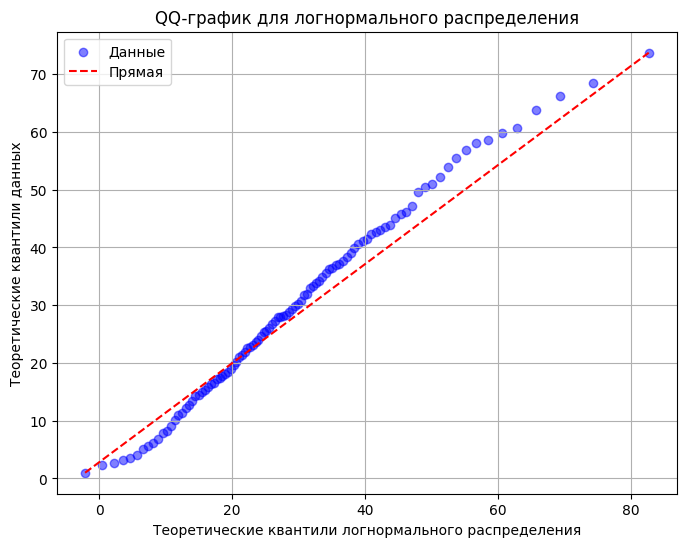

In [93]:
# Отсортируем данные для построения QQ-графика
sorted_data = df_comfort['distance_km']

theoretical_quantiles = np.quantile(sorted_data, np.linspace(0.01, 0.99, 100))

# Создадим теоретическое логнормальное распределение с данными параметрами
params = stats.lognorm.fit(sorted_data)
theoretical_lognormal = stats.lognorm(*params)

# Получим квантили теоретического логнормального распределения
theoretical_quantiles_lognormal = theoretical_lognormal.ppf(np.linspace(0.01, 0.99, 100))

# Построим QQ-график
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles_lognormal, theoretical_quantiles, color='b', alpha=0.5, label='Данные')
plt.plot([np.min(theoretical_quantiles_lognormal), np.max(theoretical_quantiles_lognormal)],
         [np.min(theoretical_quantiles), np.max(theoretical_quantiles)], color='r', linestyle='--', label='Прямая')
plt.xlabel('Теоретические квантили логнормального распределения')
plt.ylabel('Теоретические квантили данных')
plt.title('QQ-график для логнормального распределения')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
# Используя QQ-график можно увидеть, что данные для двух выборок распределены логнормально.

**Проверим гипотезу о том, что "На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе", используя параметрический Т-Тест Стьюдента и непараметрический U-тест Манна-Уитни**

In [95]:
# H0: Нет статистически значимой разницы в предпочтениях клиентов между классом поездки на дальнее расстояние.
# H1: На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.

# Уровень значимости 5%

alpha = 0.05

**Проведение параметрического Т-Теста (t-критерий Стьюдента)**

In [96]:
from scipy.stats import ttest_ind, mannwhitneyu
result_t = ttest_ind(df_economy['distance_km'], df_comfort['distance_km'])
print('p-value: %.8f' % result_t.pvalue)

if (result_t.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


**Проведение непараметрического теста Манна-Уитни (U-критерий Манна-Уитни)**

In [97]:
result_u = mannwhitneyu(df_economy['distance_km'], df_comfort['distance_km'])
print('p-value: %.8f' % result_u.pvalue)

if (result_u.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


In [98]:
# Вывод: Отвергаем нулевую гипотезу(H0) и принимаем альтернативную гипотезу(H1), которая гласит, что На дальние поездки пользователи такси предпочитают больше Comfort-класс, чем Economy-класс.